### 1 Read test files

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

test = pd.read_csv('datasets/test.csv')

# Read label files
test_label = pd.read_csv('datasets/test_label.csv')

### 2. Draw time series plots with anomaly regions:

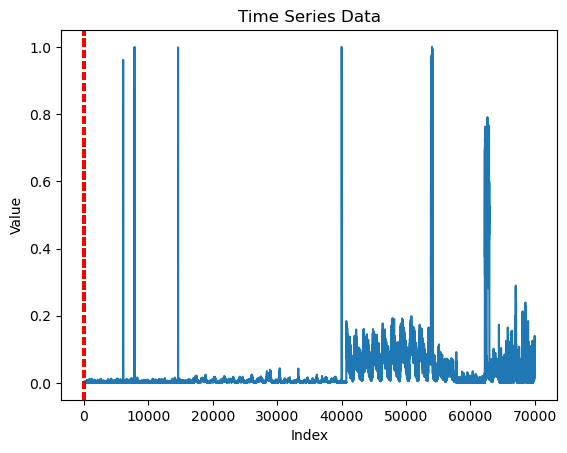

In [25]:
plt.plot(test.index, test.iloc[:, 1])  # Assuming the timestamps are not provided in the dataset
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Time Series Data')

# Highlight anomaly regions
for i in range(len(test_label)):
    plt.axvline(x=test_label.iloc[i, 0], color='red', linestyle='--')  # Assuming the anomaly points are specified by index
plt.show()

### 3. Perform EDA and find out root cause

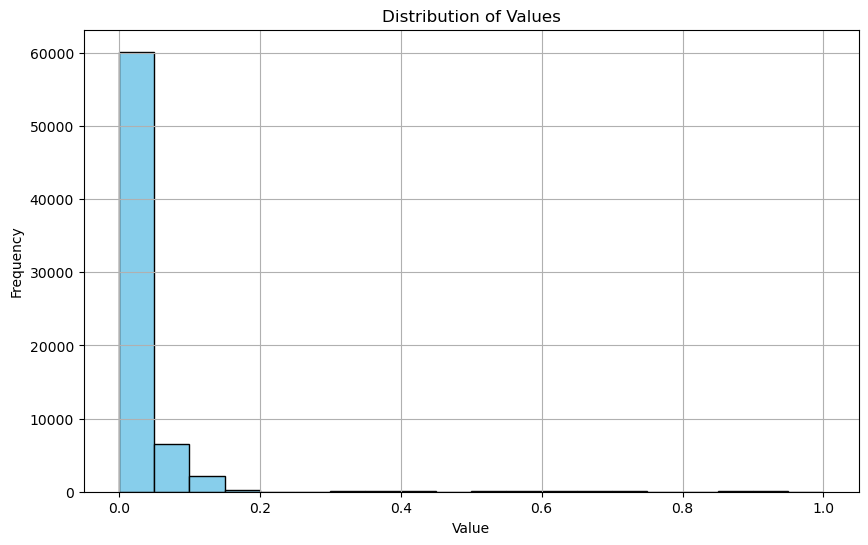

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(test.iloc[:, 1], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

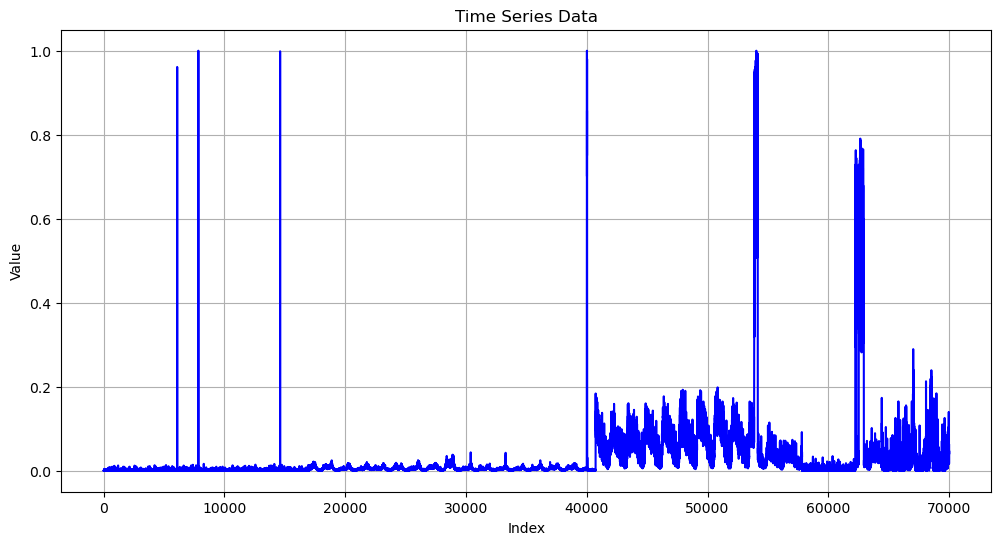

In [27]:
# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.iloc[:, 1], color='blue')
plt.title('Time Series Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

### 4. Find out the variables which are the root cause for the anomaly:  

In [28]:
# Extract anomaly regions based on indices provided in the label file
anomaly_indices = test_label.iloc[:, 0].tolist()
anomaly_values = test.iloc[anomaly_indices, 1]

# Calculate summary statistics for anomaly regions
anomaly_stats = anomaly_values.describe()

# Calculate summary statistics for non-anomaly regions
non_anomaly_values = test.drop(anomaly_indices, axis=0).iloc[:, 1]
non_anomaly_stats = non_anomaly_values.describe()

# Compare the statistics
print("Summary statistics for anomaly regions:")
print(anomaly_stats)
print("\nSummary statistics for non-anomaly regions:")
print(non_anomaly_stats)

Summary statistics for anomaly regions:
count    70001.000000
mean         0.000351
std          0.000042
min          0.000340
25%          0.000340
50%          0.000340
75%          0.000340
max          0.000510
Name: 1, dtype: float64

Summary statistics for non-anomaly regions:
count    69999.000000
mean         0.025424
std          0.072389
min          0.000000
25%          0.001495
50%          0.004785
75%          0.020927
max          1.000000
Name: 1, dtype: float64
